<a href="https://colab.research.google.com/github/Sohom-172/Personality-Detection-SoC/blob/Week-4/Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks

## What are neural networks?
They are the backbone of deep learning. The name neural networks comes from biology as their function mimics the functioning of the brain.  
Before reading the rest of this read about the maths behind neural networks [here](https://www.youtube.com/watch?v=EVeqrPGfuCY&list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN&index=45) watch 8.3-9.6

### Components of a general ML model:-
* A model to predict :- For an example, $y = mx + c$ predicts y given x
* A way to find the loss or the inaccuracies :- Example is mean squared error (MSE) in linear regression
* A way to optimise the model :- Example is the gradient descent that was seen in linear regression

## Loss Functions
* RMSE :- Generally used for regression, also called $L_2$ loss
* Cross Entropy Loss :- The one we saw in logistic regression, this is generally used for classification  
In general the Cross Entropy Loss can be written as $\sum -x_a log (x_p)$, where $x_a$ is the actual value, $x_p$ is the predicted value. (why does this work? what happens when $x_a$ is 0 and 1?)

There are a few other loss functions like :-
* Mean Absolute Loss :- The mean of the absolute difference between the predicted value and the actual value, also called $L_1$ loss
* Negative log-likelihood Loss :- More about this later, it is generally used with softmax activation function

## Optimizers in deep learning 
* SDG :- Stochastic Gradient Descent Optimiser is the classic one we have been using for linear regression. More regarding gradient descent [here](https://towardsdatascience.com/batch-mini-batch-stochastic-gradient-descent-7a62ecba642a)
* Adam :- This is a much faster optimiser that is almost always used in deep learning. More about the working [here](https://machinelearningjourney.com/index.php/2021/01/09/adam-optimizer/) (Note this is more appropriate after a course on numerical analysis which you will have next year)

## Activation functions:-

### Import statements
To install PyTorch refer to [this](https://pytorch.org/get-started/locally/)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

**Sigmoid** :- It is the sigmoid function

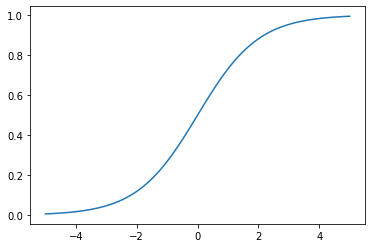

In [ ]:
Sigmoid = nn.Sigmoid()

x = torch.linspace(-5, 5, steps=100) # gives 100 points between -10 and 10
y = Sigmoid(x)

plt.plot(x,y)
plt.show()

**Tanh** :- It is the hyperbolic tangent function

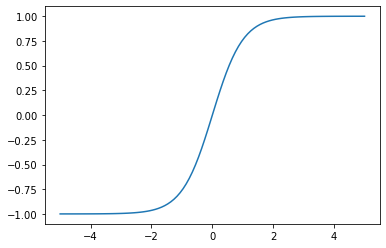

In [ ]:
Tanh = nn.Tanh()

x = torch.linspace(-5, 5, steps=100) # gives 100 points between -10 and 10
y = Tanh(x)

plt.plot(x,y)
plt.show()

**ReLU** :- The equation for this function is max(0,x)

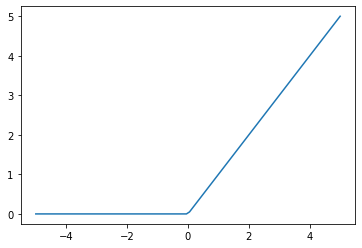

In [ ]:
ReLU = nn.ReLU()

x = torch.linspace(-5, 5, steps=100) # gives 100 points between -10 and 10
y = ReLU(x)

plt.plot(x,y)
plt.show()

**Softmax** :- it is used to convert an array into a relative probability distribution  
This is particularly helpful in multiclass classification  
Softmax fuction is defined as $\sigma (x_i)$ = $\displaystyle\frac{e^{x_i}}{\sum_{j=1}^n e^{x_j}}$, where n is the no. of classes  
It is used to convert numeric output to an output in he range [0,1], while also making sure that the sum of all the values is 1

In [ ]:
Softmax = nn.Softmax(dim=1)

x = torch.FloatTensor([[2, 5, 1]])
y = Softmax(x)

print(f'The probabilities are {y}') # using the f allows us to print variables using {}

The probabilities are tensor([[0.0466, 0.9362, 0.0171]])


### Use cases
* For the last layer, Softmax is used for multiclass classification
* For the last layer, you can use sigmoid or tanh if it is a two class classification problem
* ReLU is your goto activation function for hidden layers. This is because:
    * It is very fast to find its gradient when compared to sigmoid and tanh (ReLU can have a gradient of only 0 or 1)
    * It doesn't suffer from the **vanishing gradient problem**  
    * **Vanishing gradient problem**: 
        * If you have 5 layers with sigmoid activation, and at each layer, your gradient is around 0.3. To calulate gradients you use the chain rule, which means for the first layer your gradient is raised to the power 5. The gradients for the first layer will be of the order $0.3^{5}$ $\approx$ $0.002$. This means the randomly initialised weights will barely change for the first layer. 
        * This problem is doesn't happen with ReLU as the gradient has values 0 and 1. (There is something called ResNets which are meant to solve this issue but that's a topic for some other day)
* ReLU is also not a perfect activation as if x<0 for a neuron that neuron becomes inactive (as the gradient will always be 0 so no updates will happen). To solve this issue there a few more complex funtions like GeLU and Leaky ReLU but for most cases using ReLU is good enough.

### Note:
Things to do before moving forward
* Read more about tensors [here](https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html)  
* Read about autograd [here](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html#differentiation-in-autograd)

Pytorch works with tensors and not arrays, but for all purposes, you can covert a numpy array to a tensor by using this:    

In [ ]:
np_array = np.array([1,2,3])
x_np = torch.from_numpy(np_array)
x_np

tensor([1, 2, 3])

## Basic Flow in PyTorch
### Data Preprocessing
Like usual we will be using the Iris data set for this demo

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from torch.autograd import Variable
import torch.nn as nn
import torch

In [ ]:
iris = load_iris()
X = iris['data']
y = iris['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=2)

### Making a model

In [ ]:
# the nn.Module is the PyTorch class we are inheriting from so that we can use the prebuild functionalities
# inheritance is basically deriving the functions/ variables from your parent class (nn.Module) to a child class(Net)

class NetModel(nn.Module):
    # Init is the constructor for this python class
    # The self is like the keyword this in c++, which basically tells the complier
    # that we are refering to the current instance of the class
    def __init__(self, input_dim, hidden1_dim, hidden2_dim, no_class):
        super(NetModel, self).__init__() # this statement calls the constructor of our parent class which is nn.Module
        
        self.linear1 = nn.Linear(input_dim, hidden1_dim)
        self.linear2 = nn.Linear(hidden1_dim, hidden2_dim)
        self.linear3 = nn.Linear(hidden2_dim, no_class)
    
    # we define a function called forward for forward propagation
    # Note: we have to name the function forward
    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = F.softmax(self.linear3(x), dim=1)
        return x

In [ ]:
# making an object for our model
model = NetModel(X_test.shape[1], 30, 15, len(set(y_test)))

# len(set(y_set)) gives us the no of labels which is 3 in this case

### Choosing optimizers and Loss function

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_func  = nn.CrossEntropyLoss()

### Making the data ready for PyTorch
Read [this](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html) when you are planning to implement complex models

In [ ]:
X_train = Variable(torch.from_numpy(X_train)).float()
y_train = Variable(torch.from_numpy(y_train)).long()
X_test  = Variable(torch.from_numpy(X_test)).float()
y_test  = Variable(torch.from_numpy(y_test)).long()

# For complex models we will need to use Datasets and Dataloaders instead of Variable

### Training the Model

In [ ]:
epochs = 400
Loss = []

for i in range(epochs):

    # Dataloaders are used to split this whole data into batches, add padding, etc
    y_pred = model(X_train) 
    
    # Calculating the loss
    loss = loss_func(y_pred, y_train)
    Loss.append(loss.item())
    
    # This calculates the gradient and updates the weights for our model
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

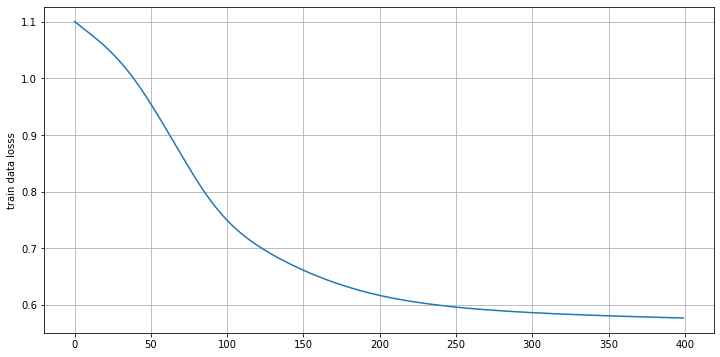

In [ ]:
# Plotting the loss

plot, (ax1) = plt.subplots(1, figsize=(12, 6))

ax1.plot(Loss)
ax1.set_ylabel("train data losss")

ax1.grid()

### Testing the model

In [ ]:
# we write no_grad as we are not going to calculate the gradient for the testing data
with torch.no_grad():
    y_pred = model(X_test)
    correct = (torch.argmax(y_pred, dim=1) == y_test).float()
    print(correct) # gives 0 when y_pred and y_test are not the same (as int/ float value of a bool false is 0)
    accuracy = correct.mean()
accuracy

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
        1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.])


tensor(0.9333)